In [3]:
from qiskit import BasicAer, IBMQ
from qiskit import QuantumCircuit, assemble, execute,ClassicalRegister
# import basic plot tools
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from random import choice
import io
import json
import base64
from qiskit.circuit import qpy_serialization
from qiskit.aqua.components.oracles import TruthTableOracle
import operator
import requests

In [9]:
URL = 'http://127.0.0.1:5000/demo/get_BV_oracle'
p = {'qubits':'5','measure':'True'}
response = requests.get(URL,params=p) 
response.json()

{'oracle': 'UUlTS0lUAwATAQAAAAAAAAABAAlpAAgAAAAGAAAABQAAAAAAAAAEAAAAAgAAAAAAAAAXY2lyY3VpdC05AAAAAAAAAABudWxscQEAAAAGAAFxAAAAAAAAAAEAAAACAAAAAwAAAAQAAAAFYwEAAAAFAAFjAAAAAAAAAAEAAAACAAAAAwAAAAQAAAAAAAAAAAAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABIR2F0ZXEAAAAAAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAEhHYXRlcQAAAAEABQAAAAAAAAABAAAAAAAAAAAAAAAAAAAASEdhdGVxAAAAAgAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABIR2F0ZXEAAAADAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAEhHYXRlcQAAAAQABQAAAAAAAAABAAAAAAAAAAAAAAAAAAAAWEdhdGVxAAAABQAFAAAAAAAAAAEAAAAAAAAAAAAAAAAAAABIR2F0ZXEAAAAFAAcAAAAAAAAABgAAAAAAAAAAAAAAAAAAAEJhcnJpZXJxAAAAAHEAAAABcQAAAAJxAAAAA3EAAAAEcQAAAAUABgAAAAAAAAACAAAAAAAAAAAAAAAAAAAAQ1hHYXRlcQAAAABxAAAABQAGAAAAAAAAAAIAAAAAAAAAAAAAAAAAAABDWEdhdGVxAAAAAXEAAAAFAAYAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAENYR2F0ZXEAAAACcQAAAAUABgAAAAAAAAACAAAAAAAAAAAAAAAAAAAAQ1hHYXRlcQAAAARxAAAABQAHAAAAAAAAAAYAAAAAAAAAAAAAAAAAAABCYXJyaWVycQAAAABxAAAAAXEAAAACcQAAAANxAAAABHEAAAAFAAUAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAEhHYXRlcQAAAAAABwAAAAAAAAABAAAAAQAAAAAAAAAAAAAATWVhc3Vy

In [10]:
def json_to_circuit(circuit_json):
    qpy_file = io.BytesIO(base64.b64decode(circuit_json))
    circuit = qpy_serialization.load(qpy_file)[0]
    return circuit

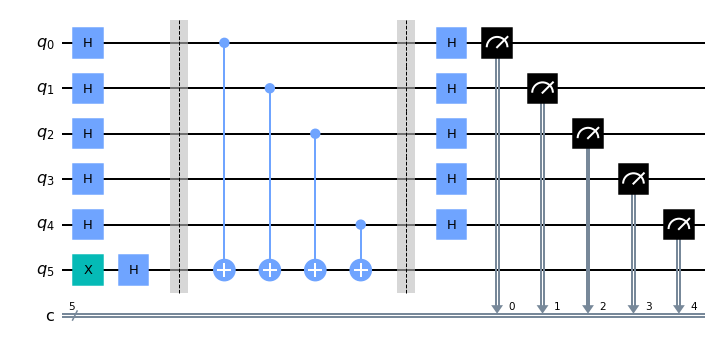

In [11]:
oracle = json_to_circuit(response.json()['oracle'])
key = response.json()['key']
oracle.draw(output='mpl')

In [12]:
key_URL = 'http://127.0.0.1:5000/demo/get_BV_key'
p={'oracle':response.json()['oracle']}
response = requests.get(key_URL,params=p)
response.json()

{'key': '11101'}

In [16]:
URL3 = 'http://127.0.0.1:5000/BVazirani'
p3 = {'bitmap': '11101000', 'api_key':'dc2f533544c3bfa39230d244c7986dac6264ca6adbe570f3ce4f7d197d9c815d2ab9e36a5011182969bcce0a059654c59c80b401697bc6626916482a26bfdd8e'}
response = requests.get(URL3, params=p3)
response.json()

{'key': '001'}